Sentiment_Analysis on Elon_musk tweets.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from nltk.corpus import stopwords
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [ ]:
tweets=pd.read_csv('Elon_musk.csv',encoding="latin")

In [ ]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
tweets.shape

(1999, 2)

In [ ]:
#No.of Words
tweets['word_count']=tweets['Text'].apply(lambda x: len(str(x).split(" ")))
tweets[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [ ]:
#No.of Characters
tweets['char_count']=tweets['Text'].str.len()
tweets[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#No.of Stopwords
stop=stopwords.words('english')
tweets['stopwords']=tweets['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweets[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [ ]:
# No.of Numerics
tweets['numerics']=tweets['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tweets[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [ ]:
# No.of Uppercase Words
tweets['upper']=tweets['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tweets[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [ ]:
#No.of Lowercase Words
tweets['lower']=tweets['Text'].apply(lambda x: len([x for x in x.split() if x.lower()]))
tweets[['Text','lower']].head()

,Text,lower
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [ ]:
#LOwer Case
tweets['Text']=tweets['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
tweets['Text'].head()


0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [ ]:
#Removal of punctuation
tweets['Text']=tweets['Text'].str.replace('[^\w\s]','')
tweets['Text'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [ ]:
# Removal of stopwords
stop=stopwords.words('english')
tweets['Text']=tweets['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
tweets['Text'].head()


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [ ]:
#Removal of commonword
freq=pd.Series(' '.join(tweets['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [ ]:
freq=list(freq.index)

In [ ]:
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [ ]:
#Removal of Rarewords
freq=pd.Series(' '.join(tweets['Text']).split()).value_counts()[-10:]  
freq             

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [ ]:
freq=list(freq.index)
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

Tokenization

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')
TextBlob(tweets['Text'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

Stemming

In [ ]:
#Stemming
from nltk.stem import PorterStemmer
st=PorterStemmer()
tweets['Text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                       kunalb11 im alien
1       id_aa_carmack ray trace cyberpunk hdr nextleve...
2                              joerogan spotifi interview
3                                 gtera27 doge underestim
4       teslacn congratul china amaz execut last year ...
                              ...                        
1994    true sound surreal neg propaganda still easi f...
1995           make sure read ur term condit click accept
1996                               teslagong samwis gamge
1997                       dumb dumber u0001f525u0001f525
1998                             progress updat august 28
Name: Text, Length: 1999, dtype: object

Lemmatization

In [ ]:
#Lemmatization
import nltk
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')
tweets['Text']=tweets['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweets['Text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

Text Processing

N-Grams

In [ ]:
#n-grams
TextBlob(tweets['Text'][2]).ngrams(2)

[WordList(['joerogan', 'spotify']), WordList(['spotify', 'interview'])]

In [ ]:
#Term Frequency
tf1 = (tweets['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf1.columns=['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


In [ ]:
#Inverse Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i,'idf'] = np.log(tweets.shape[0]/(len(tweets[tweets['Text'].str.contains(word)])))
  

  

In [ ]:
tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


Term Frequency - Inverse Document Frequency(TF-IDF)

In [ ]:
tf1['tfidf'] = tf1['tf']*tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000,lowercase=True,analyzer='word',
                        stop_words='english',ngram_range=(1,1))
vect=tfidf.fit_transform(tweets['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf

TfidfVectorizer(max_features=1000, stop_words='english')

Bag of Words

In [ ]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(max_features=1000,lowercase=True,analyzer='word',
                        stop_words='english',ngram_range=(1,1))
data_bow=bow.fit_transform(tweets['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 7374 stored elements in Compressed Sparse Row format>

Sentiment Analysis

In [ ]:
#sentiment analysis
tweets['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [ ]:
tweets['sentiment']=tweets['Text'].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Text','sentiment']]

,Text,sentiment
0,kunalb11 im alien,-0.250000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.000000
2,joerogan spotify interview,0.000000
3,gtera27 doge underestimated,0.000000
4,teslacn congratulation china amazing execution...,0.200000
...,...,...
1994,true sound surreal negative propaganda still e...,0.152381
1995,make sure read ur term condition clicking accept,0.500000
1996,teslagong samwise gamgee,0.000000
1997,dumb dumber u0001f525u0001f525,-0.375000


Visualizing Sentiment values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


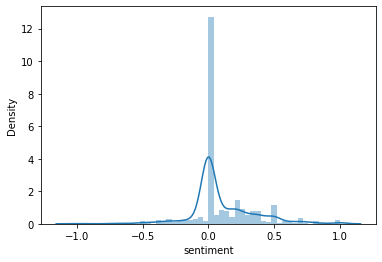

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(tweets['sentiment'])

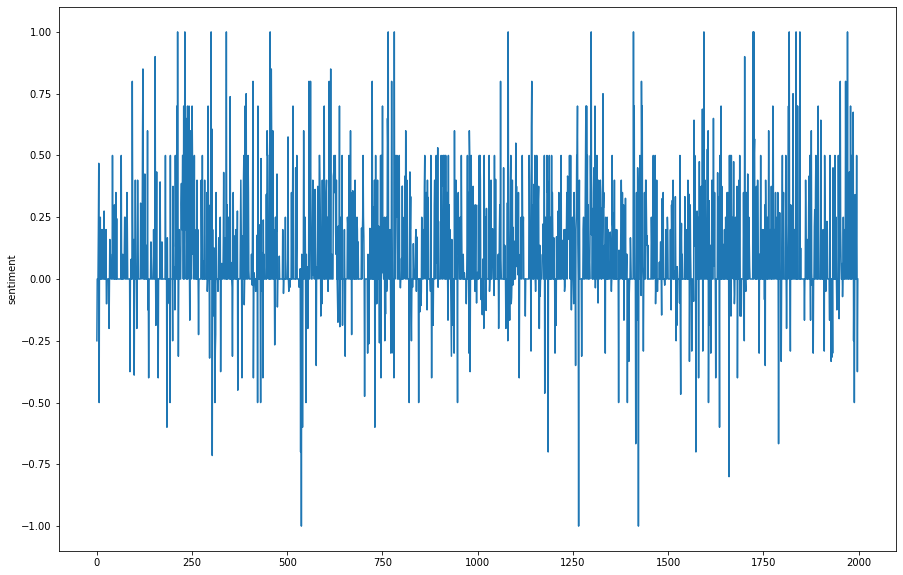

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=tweets['sentiment'])

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");         

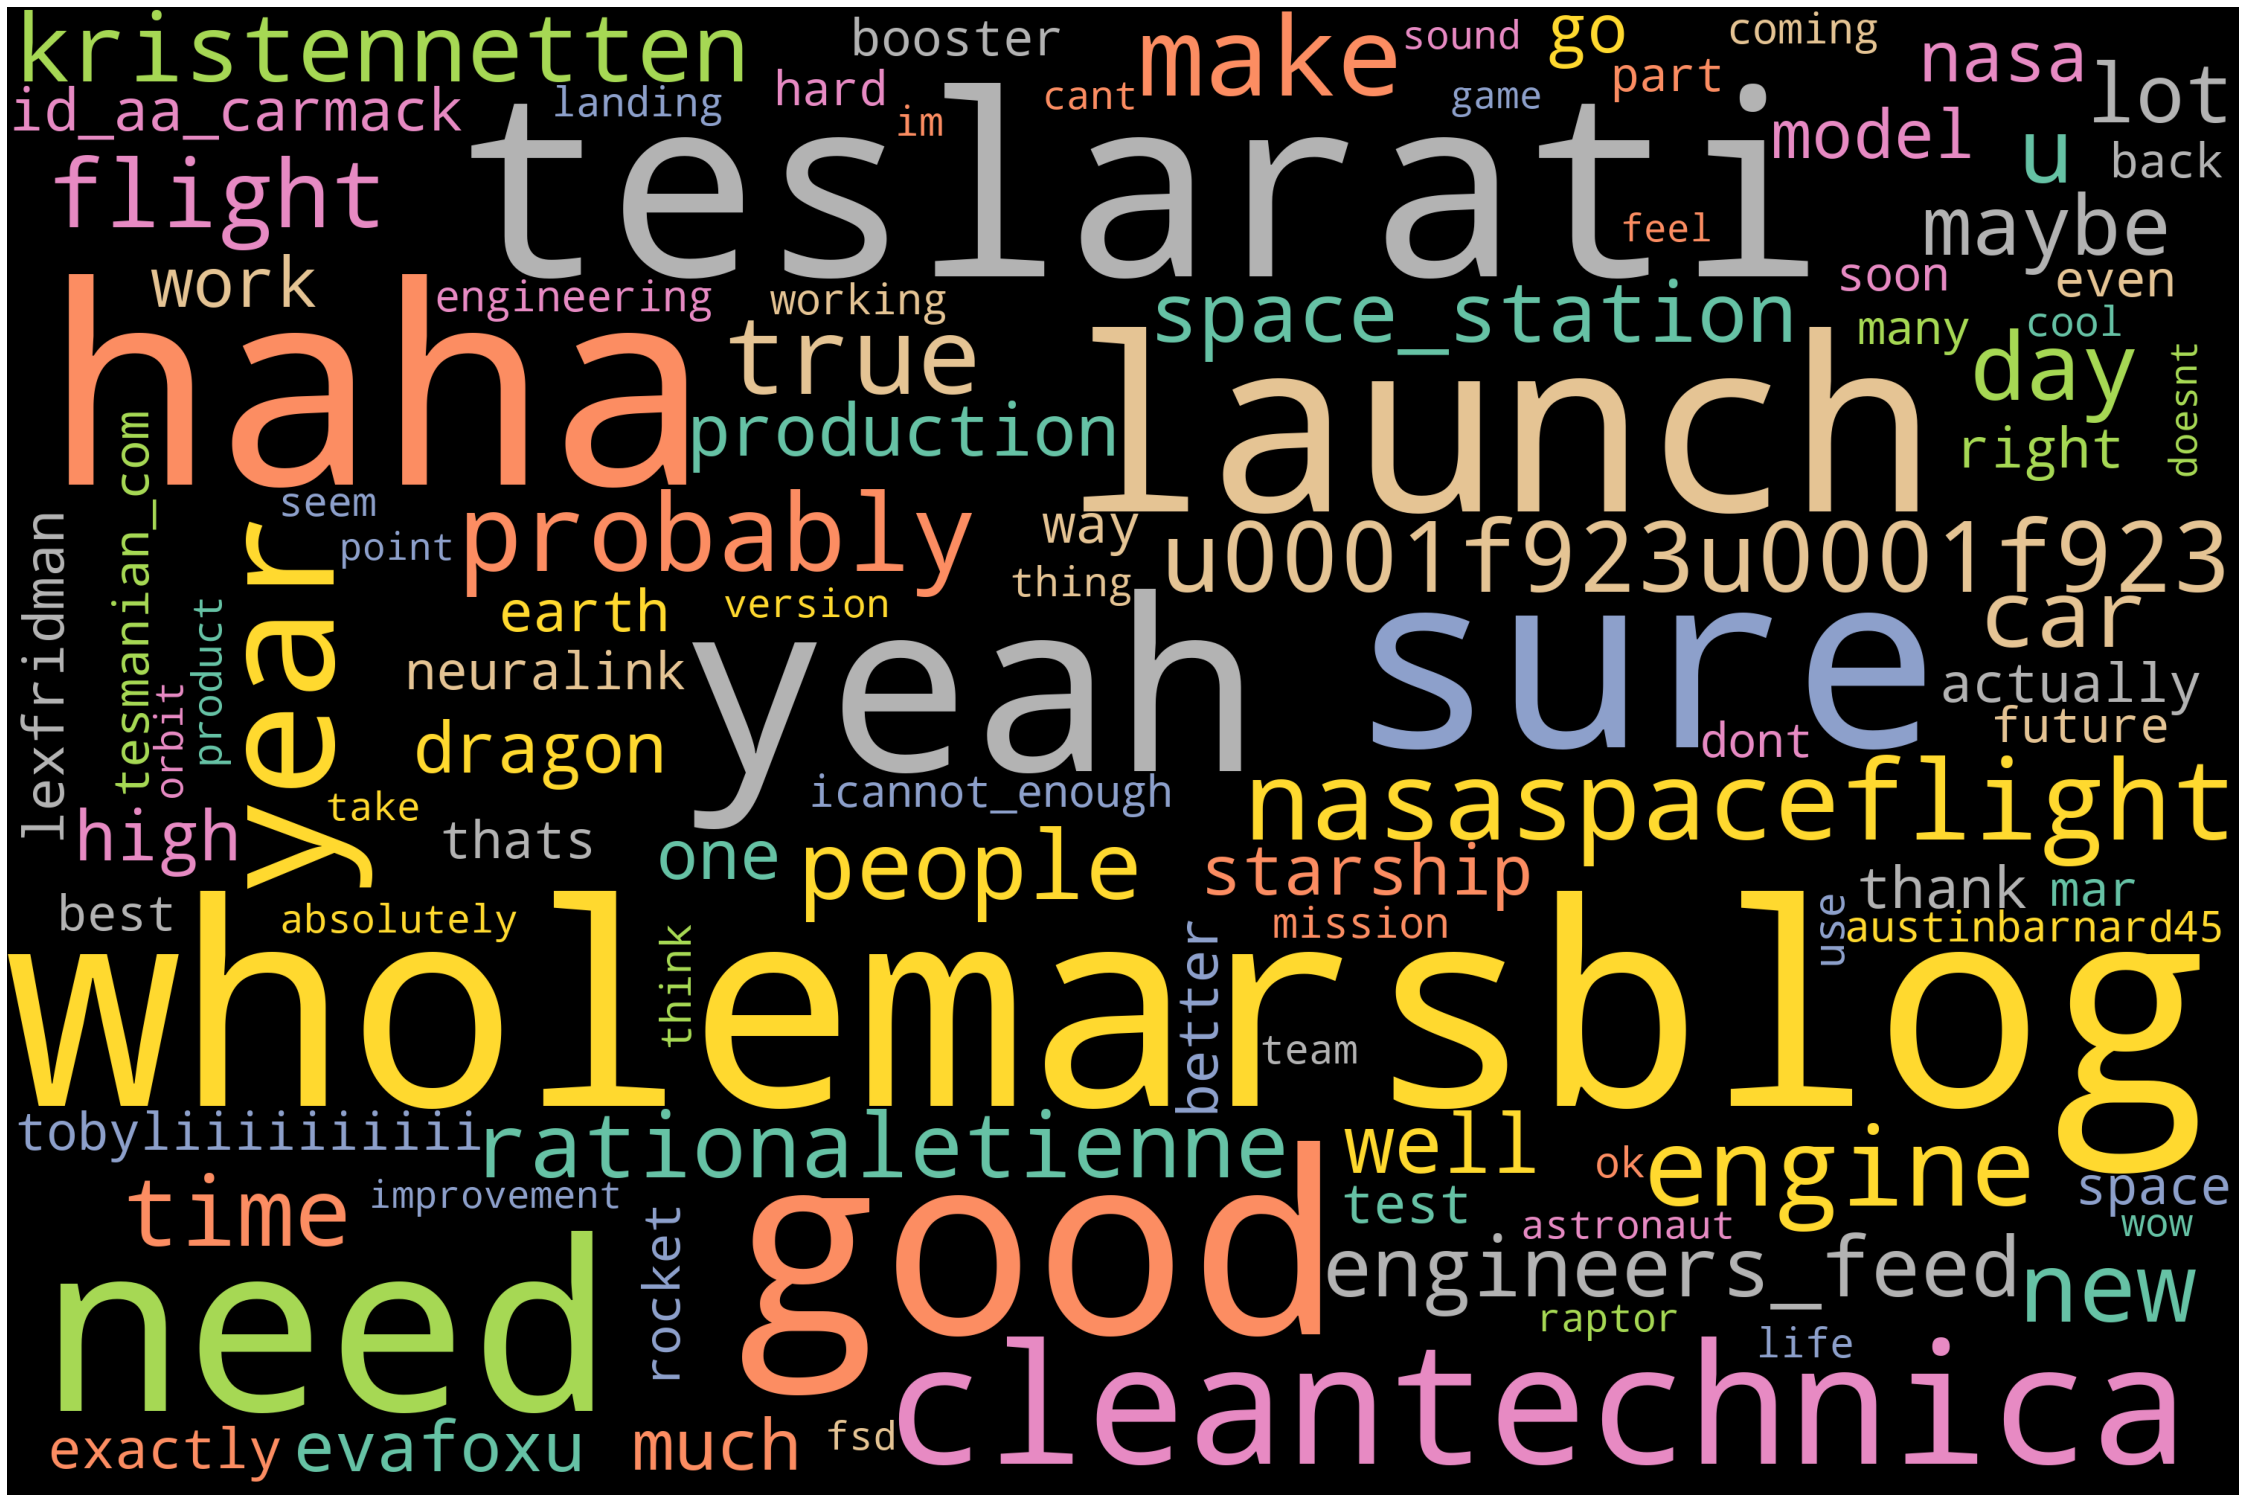

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(' '.join(tweets['Text']))
# Plot
plot_cloud(wordcloud)

In [ ]:
#Polarity scores of Tweets
tweets['polarity'] = tweets['Text'].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Text','polarity']].head()

,Text,polarity
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


In [ ]:
tweets[tweets.polarity>0].head()

,Unnamed: 0,Text,word_count,char_count,stopwords,numerics,upper,lower,sentiment,polarity
4,5,teslacn congratulation china amazing execution...,17,104,5,0,0,17,0.200000,0.200000
5,6,happy new year ox httpstco9wfkmyu2oj,7,49,2,0,0,7,0.468182,0.468182
7,8,owensparks_ anonyx10 haha thanks,6,46,0,0,0,6,0.200000,0.200000
9,10,entertaining outcome likely,8,48,4,0,0,8,0.250000,0.250000
13,14,geoffkeighley unrealengine getting real,5,46,0,0,0,5,0.200000,0.200000


In [ ]:
tweets[tweets.polarity<0].head()

,Unnamed: 0,Text,word_count,char_count,stopwords,numerics,upper,lower,sentiment,polarity
0,1,kunalb11 im alien,4,22,1,0,0,4,-0.25,-0.25
6,7,frodo underdoge thought would fail httpstcozgx...,12,96,5,0,0,14,-0.50,-0.50
25,26,rationaletienne adamklotz_ starlink staggering...,16,144,5,0,0,16,-0.10,-0.10
26,27,rationaletienne adamklotz_ need pas deep chasm...,20,139,7,0,0,20,-0.10,-0.10
32,33,sruhle everyone receives stock comp stockoptio...,23,138,9,0,1,23,-0.20,-0.20


In [ ]:
tweets[tweets.polarity==0].head()

,Unnamed: 0,Text,word_count,char_count,stopwords,numerics,upper,lower,sentiment,polarity
1,2,id_aa_carmack ray tracing cyberpunk hdr nextle...,13,82,4,0,1,13,0.0,0.0
2,3,joerogan spotify interview,4,35,0,0,0,4,0.0,0.0
3,4,gtera27 doge underestimated,4,31,1,0,0,4,0.0,0.0
8,9,anonyx10 indeed tweet definitely represent rea...,11,89,2,0,0,11,0.0,0.0
10,11,givedirectly sent,4,28,1,0,0,4,0.0,0.0


In [ ]:
def sent_type(Text):
 for polarity in Text:
        if polarity>0:
           print('positive')
        elif polarity==0:
           print('neutral')   
        else:
           print('negative')

In [ ]:
sent_type(tweets['polarity'])

negative
neutral
neutral
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
positive
neutral
pos

In [ ]:
tweets['category']=tweets['polarity']

tweets.loc[tweets.category>0,'category']='Positive'
tweets.loc[tweets.category!='Positive','category']='Negative'

tweets['category']=tweets['category'].astype('category')
tweets.dtypes

Unnamed: 0       int64
Text            object
word_count       int64
char_count       int64
stopwords        int64
numerics         int64
upper            int64
lower            int64
sentiment      float64
polarity       float64
category      category
dtype: object

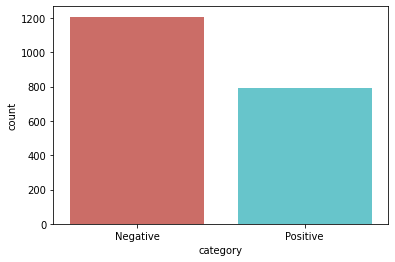

In [ ]:
#visualizing +ve and -ve Tweets
sns.countplot(x='category',data=tweets,palette='hls')

In [ ]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    60.430215
Positive    39.569785
Name: category, dtype: float64

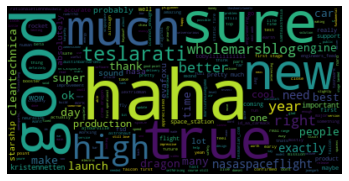

In [ ]:
# +ve TWEETS
positive_tweets=tweets[tweets.category=="Positive"]
positive_tweets_text=' '.join(positive_tweets.Text.to_numpy().tolist())
positive_tweets_cloud=WordCloud(background_color='black',max_words=500).generate(positive_tweets_text)
plt.imshow(positive_tweets_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

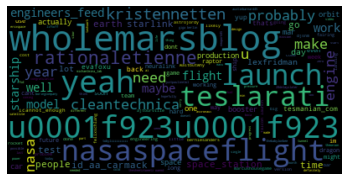

In [ ]:
# -ve TWEETS
negative_tweets=tweets[tweets.category=="Negative"]
negative_tweets_text=' '.join(negative_tweets.Text.to_numpy().tolist())
negative_tweets_cloud=WordCloud(background_color='black',max_words=500).generate(negative_tweets_text)
plt.imshow(negative_tweets_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Therefore,by Sentiment Analysis and WordCloud we can conclude that most frequent Elon Musk tweet words are 'Tesla','AMP','Great','whole','emars','spacex'.......etc.
And by sentiment analysis,probabities of Negative and Positive words are 60.5% and 39.5% respectively.
So therefore more neagtive words than positive words in Elon Musk Tweets.

Q.NO-2

Reviews of a product in AMAZON

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re 
import nltk
from  nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen,urlretrieve
import warnings
warnings.filterwarnings('ignore')

In [28]:
nltk.download('stopwords')
nltk.download('punct')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punct: Package 'punct' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving headphone_datn.csv to headphone_datn.csv


In [ ]:
review=pd.read_csv('headphone_datn.csv')

In [ ]:
review

,Customer_Name,REVIEW_TITLE,Color,REVIEW_DATE,COMMENTS,RATINGS
0,Ramdika,Really Exceed my expectation.,Black,30-May-21,Okay.. I was skeptical at first to buy this as...,5
1,Sachin AK,Great for a change from inear buds,Black,01-Jun-21,The earphone is worth what you pay for. The de...,5
2,Manikandan Raj,For people with sensitive ears,Black,05-Sep-21,"Particularly for people with sensitive ears, w...",4
3,Reviewguy,I tested it for a week and here's a detailed r...,Iguana,11-Sep-21,Built Quality 6.5 10The lower wire is a durabl...,4
4,Sridhar Sarkar,Not a good headphone,Iguana,26-Jun-21,Don't go with the over all 4 start rating. Thi...,2
...,...,...,...,...,...,...
1599,Darshan,Simply fine,Blue,11-Jun-22,Quite good sound qualityAnd had impressively g...,4
1600,Happy Singh,Value for money,Spirit Lime,13-Jun-22,Osm,5
1601,sushanth,Value for money,White,09-Jun-22,"Earphones fits well onto the ears, doesn't blo...",5
1602,Mayuri shinde,Duplicate headphones... Not worth for price,White,09-Jun-22,Sound quality very bad... Over all very bad pr...,1


In [17]:
review.head()

,Customer_Name,REVIEW_TITLE,Color,REVIEW_DATE,COMMENTS,RATINGS
0,Ramdika,Really Exceed my expectation.,Black,30-May-21,Okay.. I was skeptical at first to buy this as...,5
1,Sachin AK,Great for a change from inear buds,Black,01-Jun-21,The earphone is worth what you pay for. The de...,5
2,Manikandan Raj,For people with sensitive ears,Black,05-Sep-21,"Particularly for people with sensitive ears, w...",4
3,Reviewguy,I tested it for a week and here's a detailed r...,Iguana,11-Sep-21,Built Quality 6.5 10The lower wire is a durabl...,4
4,Sridhar Sarkar,Not a good headphone,Iguana,26-Jun-21,Don't go with the over all 4 start rating. Thi...,2


In [18]:
review["COMMENTS"]

0       Okay.. I was skeptical at first to buy this as...
1       The earphone is worth what you pay for. The de...
2       Particularly for people with sensitive ears, w...
3       Built Quality 6.5 10The lower wire is a durabl...
4       Don't go with the over all 4 start rating. Thi...
                              ...                        
1599    Quite good sound qualityAnd had impressively g...
1600                                                  Osm
1601    Earphones fits well onto the ears, doesn't blo...
1602    Sound quality very bad... Over all very bad pr...
1603    This is only for calls...Mic is good...But Com...
Name: COMMENTS, Length: 1604, dtype: object

In [20]:
review.COMMENTS.shape

(1604,)

In [33]:
#No.of Words
review['word_count']=review['COMMENTS'].apply(lambda x: len(str(x).split(" ")))
review[['COMMENTS','word_count']].head()

,COMMENTS,word_count
0,Okay.. I was skeptical at first to buy this as...,65
1,The earphone is worth what you pay for. The de...,67
2,"Particularly for people with sensitive ears, w...",41
3,Built Quality 6.5 10The lower wire is a durabl...,260
4,Don't go with the over all 4 start rating. Thi...,124


In [34]:
#No.of Characters
review['char_count']=review['COMMENTS'].str.len()
review[['COMMENTS','char_count']].head()

,COMMENTS,char_count
0,Okay.. I was skeptical at first to buy this as...,333.0
1,The earphone is worth what you pay for. The de...,374.0
2,"Particularly for people with sensitive ears, w...",211.0
3,Built Quality 6.5 10The lower wire is a durabl...,1433.0
4,Don't go with the over all 4 start rating. Thi...,655.0


In [35]:
# No.of Numerics
review['numerics']=review['COMMENTS'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
review[['COMMENTS','numerics']].head()

,COMMENTS,numerics
0,Okay.. I was skeptical at first to buy this as...,0
1,The earphone is worth what you pay for. The de...,1
2,"Particularly for people with sensitive ears, w...",0
3,Built Quality 6.5 10The lower wire is a durabl...,6
4,Don't go with the over all 4 start rating. Thi...,2


In [37]:
#No.of Stopwords
stop=stopwords.words('english')
review['stopwords']=review['COMMENTS'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
review[['COMMENTS','stopwords']].head()

,COMMENTS,stopwords
0,Okay.. I was skeptical at first to buy this as...,27
1,The earphone is worth what you pay for. The de...,24
2,"Particularly for people with sensitive ears, w...",17
3,Built Quality 6.5 10The lower wire is a durabl...,99
4,Don't go with the over all 4 start rating. Thi...,50


In [38]:
# No.of Uppercase Words
review['upper']=review['COMMENTS'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
review[['COMMENTS','upper']].head()

,COMMENTS,upper
0,Okay.. I was skeptical at first to buy this as...,1
1,The earphone is worth what you pay for. The de...,0
2,"Particularly for people with sensitive ears, w...",0
3,Built Quality 6.5 10The lower wire is a durabl...,1
4,Don't go with the over all 4 start rating. Thi...,0


In [39]:
#No.of Lowercase Words
review['lower']=review['COMMENTS'].apply(lambda x: len([x for x in str(x).split() if x.lower()]))
review[['COMMENTS','lower']].head()

,COMMENTS,lower
0,Okay.. I was skeptical at first to buy this as...,65
1,The earphone is worth what you pay for. The de...,67
2,"Particularly for people with sensitive ears, w...",41
3,Built Quality 6.5 10The lower wire is a durabl...,260
4,Don't go with the over all 4 start rating. Thi...,124


In [42]:
#LOwer Case
review['COMMENTS']=review['COMMENTS'].apply(lambda x:" ".join(x.lower() for x in str(x).split()))
review['COMMENTS'].head()

0    okay.. i was skeptical at first to buy this as...
1    the earphone is worth what you pay for. the de...
2    particularly for people with sensitive ears, w...
3    built quality 6.5 10the lower wire is a durabl...
4    don't go with the over all 4 start rating. thi...
Name: COMMENTS, dtype: object

In [45]:
#Removal of punctuation
review['COMMENTS']=review['COMMENTS'].str.replace('[^\w\s]','')
review['COMMENTS'].head()

0    okay i was skeptical at first to buy this as i...
1    the earphone is worth what you pay for the des...
2    particularly for people with sensitive ears wh...
3    built quality 65 10the lower wire is a durable...
4    dont go with the over all 4 start rating this ...
Name: COMMENTS, dtype: object

In [46]:
# Removal of stopwords
stop=stopwords.words('english')
review['COMMENTS']=review['COMMENTS'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
review['COMMENTS'].head()

0    okay skeptical first buy tight budget honest l...
1    earphone worth pay design earbud may cause pai...
2    particularly people sensitive ears gets ear pa...
3    built quality 65 10the lower wire durable nylo...
4    dont go 4 start rating boat brand endorse lot ...
Name: COMMENTS, dtype: object

In [47]:
#Removal of commonword
freq=pd.Series(' '.join(review['COMMENTS']).split()).value_counts()[:10]
freq

good       673
quality    543
sound      467
product    414
bass       166
one        156
ear        151
working    151
boat       149
price      145
dtype: int64

In [48]:
freq=list(freq.index)

In [50]:
 review['COMMENTS']= review['COMMENTS'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
review['COMMENTS'].head()

0    okay skeptical first buy tight budget honest l...
1    earphone worth pay design earbud may cause pai...
2    particularly people sensitive ears gets pain w...
3    built 65 10the lower wire durable nylon know t...
4    dont go 4 start rating brand endorse lot money...
Name: COMMENTS, dtype: object

In [51]:
#Removal of Rarewords
freq=pd.Series(' '.join( review['COMMENTS']).split()).value_counts()[-10:]  
freq             

released         1
improvised       1
heavily          1
delicately       1
garbage          1
worthlessthey    1
lowi             1
slipped          1
usually          1
callsmic         1
dtype: int64

In [55]:
freq=list(freq.index)
review['COMMENTS'] = review['COMMENTS'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
review['COMMENTS'].head()

0    okay skeptical first buy tight budget honest l...
1    earphone worth pay design earbud may cause pai...
2    particularly people sensitive ears gets pain w...
3    built 65 10the lower wire durable nylon know t...
4    dont go 4 start rating brand endorse lot money...
Name: COMMENTS, dtype: object

TOKENIZATION

In [58]:
#Tokenization
import nltk
nltk.download('punkt')
from textblob import TextBlob
TextBlob(review['COMMENTS'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['earphone', 'worth', 'pay', 'design', 'earbud', 'may', 'cause', 'pain', 'prolonged', 'usage', 'case', 'basshead', '103', 'goodin', 'terms', 'way', 'advanced', 'basshead', '103', 'also', 'increasedquality', 'wise', 'would', 'preferred', 'nylone', 'wrapping', 'even', 'two', 'small', 'cable', 'would', 'better', 'since', 'time', 'cable', 'gets', 'damaged'])

STEMMING

In [59]:
#Stemming
from nltk.stem import PorterStemmer
st=PorterStemmer()
review['COMMENTS'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       okay skeptic first buy tight budget honest lit...
1       earphon worth pay design earbud may caus pain ...
2       particularli peopl sensit ear get pain wear bu...
3       built 65 10the lower wire durabl nylon know to...
4       dont go 4 start rate brand endors lot money ma...
                              ...                        
1599                              quit qualityand impress
1600                                                  osm
1601    earphon fit well onto ear doesnt block outsid ...
1602                                    bad bad happi buy
1603                      goodbut comfort bad music worst
Name: COMMENTS, Length: 1604, dtype: object

LEMMITIZATION

In [60]:
#Lemmatization
import nltk
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')
review['COMMENTS']=review['COMMENTS'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
review['COMMENTS'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    okay skeptical first buy tight budget honest l...
1    earphone worth pay design earbud may cause pai...
2    particularly people sensitive ear get pain wea...
3    built 65 10the lower wire durable nylon know t...
4    dont go 4 start rating brand endorse lot money...
Name: COMMENTS, dtype: object

Text Processing

N-GRAMS

In [61]:
#n-grams
TextBlob(review['COMMENTS'][2]).ngrams(2)

[WordList(['particularly', 'people']),
 WordList(['people', 'sensitive']),
 WordList(['sensitive', 'ear']),
 WordList(['ear', 'get']),
 WordList(['get', 'pain']),
 WordList(['pain', 'wearing']),
 WordList(['wearing', 'bud']),
 WordList(['bud', 'kind']),
 WordList(['kind', 'headset']),
 WordList(['headset', 'great']),
 WordList(['great', 'choice']),
 WordList(['choice', 'doesnt']),
 WordList(['doesnt', 'block']),
 WordList(['block', 'air']),
 WordList(['air', 'flow']),
 WordList(['flow', 'drum']),
 WordList(['drum', 'well'])]

In [62]:
#Term Frequency
tf1 = (review['COMMENTS'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf1.columns=['words','tf']
tf1

,words,tf
0,would,2
1,103,2
2,cable,2
3,basshead,2
4,earphone,1
5,even,1
6,preferred,1
7,nylone,1
8,wrapping,1
9,two,1


In [64]:
#Inverse Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i,'idf'] = np.log(review.shape[0]/(len(review[review['COMMENTS'].str.contains(word)])))

In [65]:
tf1

,words,tf,idf
0,would,2,4.244762
1,103,2,7.380256
2,cable,2,3.769338
3,basshead,2,5.077671
4,earphone,1,2.014280
5,even,1,3.302718
6,preferred,1,7.380256
7,nylone,1,7.380256
8,wrapping,1,7.380256
9,two,1,4.982361


Term Frequency - Inverse Document Frequency(TF-IDF)

In [66]:
tf1['tfidf'] = tf1['tf']*tf1['idf']
tf1

,words,tf,idf,tfidf
0,would,2,4.244762,8.489523
1,103,2,7.380256,14.760512
2,cable,2,3.769338,7.538676
3,basshead,2,5.077671,10.155341
4,earphone,1,2.014280,2.014280
5,even,1,3.302718,3.302718
6,preferred,1,7.380256,7.380256
7,nylone,1,7.380256,7.380256
8,wrapping,1,7.380256,7.380256
9,two,1,4.982361,4.982361


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000,lowercase=True,analyzer='word',
                        stop_words='english',ngram_range=(1,1))
vect=tfidf.fit_transform(review['COMMENTS'])
vect

<1604x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7659 stored elements in Compressed Sparse Row format>

In [68]:
tfidf

TfidfVectorizer(max_features=1000, stop_words='english')

Bag of Words

In [69]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(max_features=1000,lowercase=True,analyzer='word',
                        stop_words='english',ngram_range=(1,1))
data_bow=bow.fit_transform(review['COMMENTS'])
data_bow

<1604x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 7659 stored elements in Compressed Sparse Row format>

SENTIMENT ANALYSIS or EMOTION MINING

In [70]:
#sentiment analysis
review['COMMENTS'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (0.16726190476190475, 0.4227513227513227)
1                   (0.32999999999999996, 0.5)
2     (0.4166666666666667, 0.7208333333333333)
3       (0.211984126984127, 0.562857142857143)
4    (0.33888888888888885, 0.6861111111111111)
Name: COMMENTS, dtype: object

In [72]:
review['sentiment']=review['COMMENTS'].apply(lambda x: TextBlob(x).sentiment[0])
review[['COMMENTS','sentiment']]

,COMMENTS,sentiment
0,okay skeptical first buy tight budget honest l...,0.167262
1,earphone worth pay design earbud may cause pai...,0.330000
2,particularly people sensitive ear get pain wea...,0.416667
3,built 65 10the lower wire durable nylon know t...,0.211984
4,dont go 4 start rating brand endorse lot money...,0.338889
...,...,...
1599,quite qualityand impressively,1.000000
1600,osm,0.000000
1601,earphone fit well onto ear doesnt block outsid...,0.450000
1602,bad bad happy buy,-0.200000


Visualizing SENTIMENT values

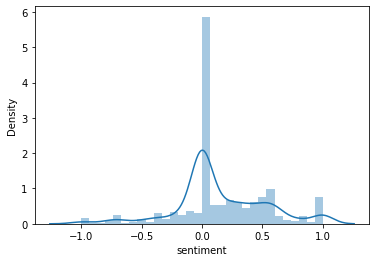

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(review['sentiment'])

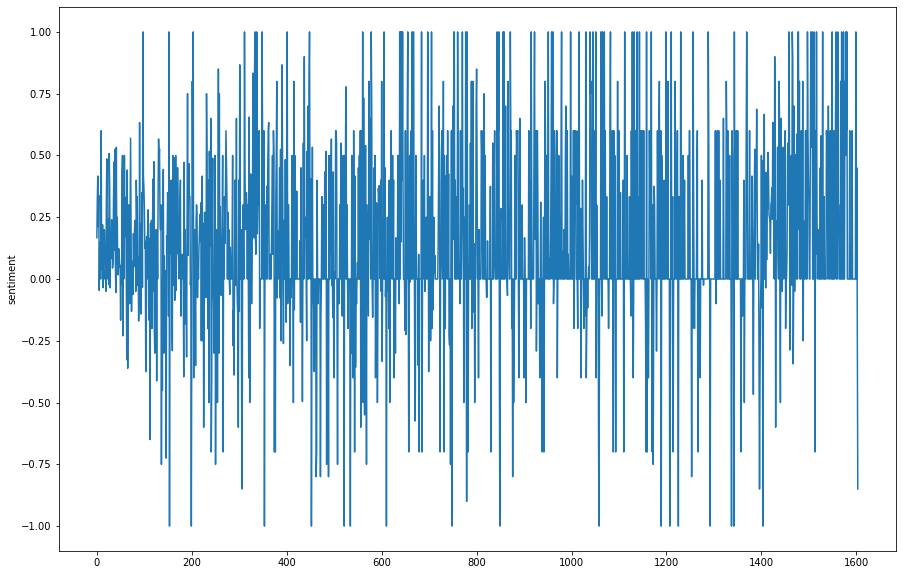

In [75]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=review['sentiment'])

WORD-CLOUD

In [76]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");   

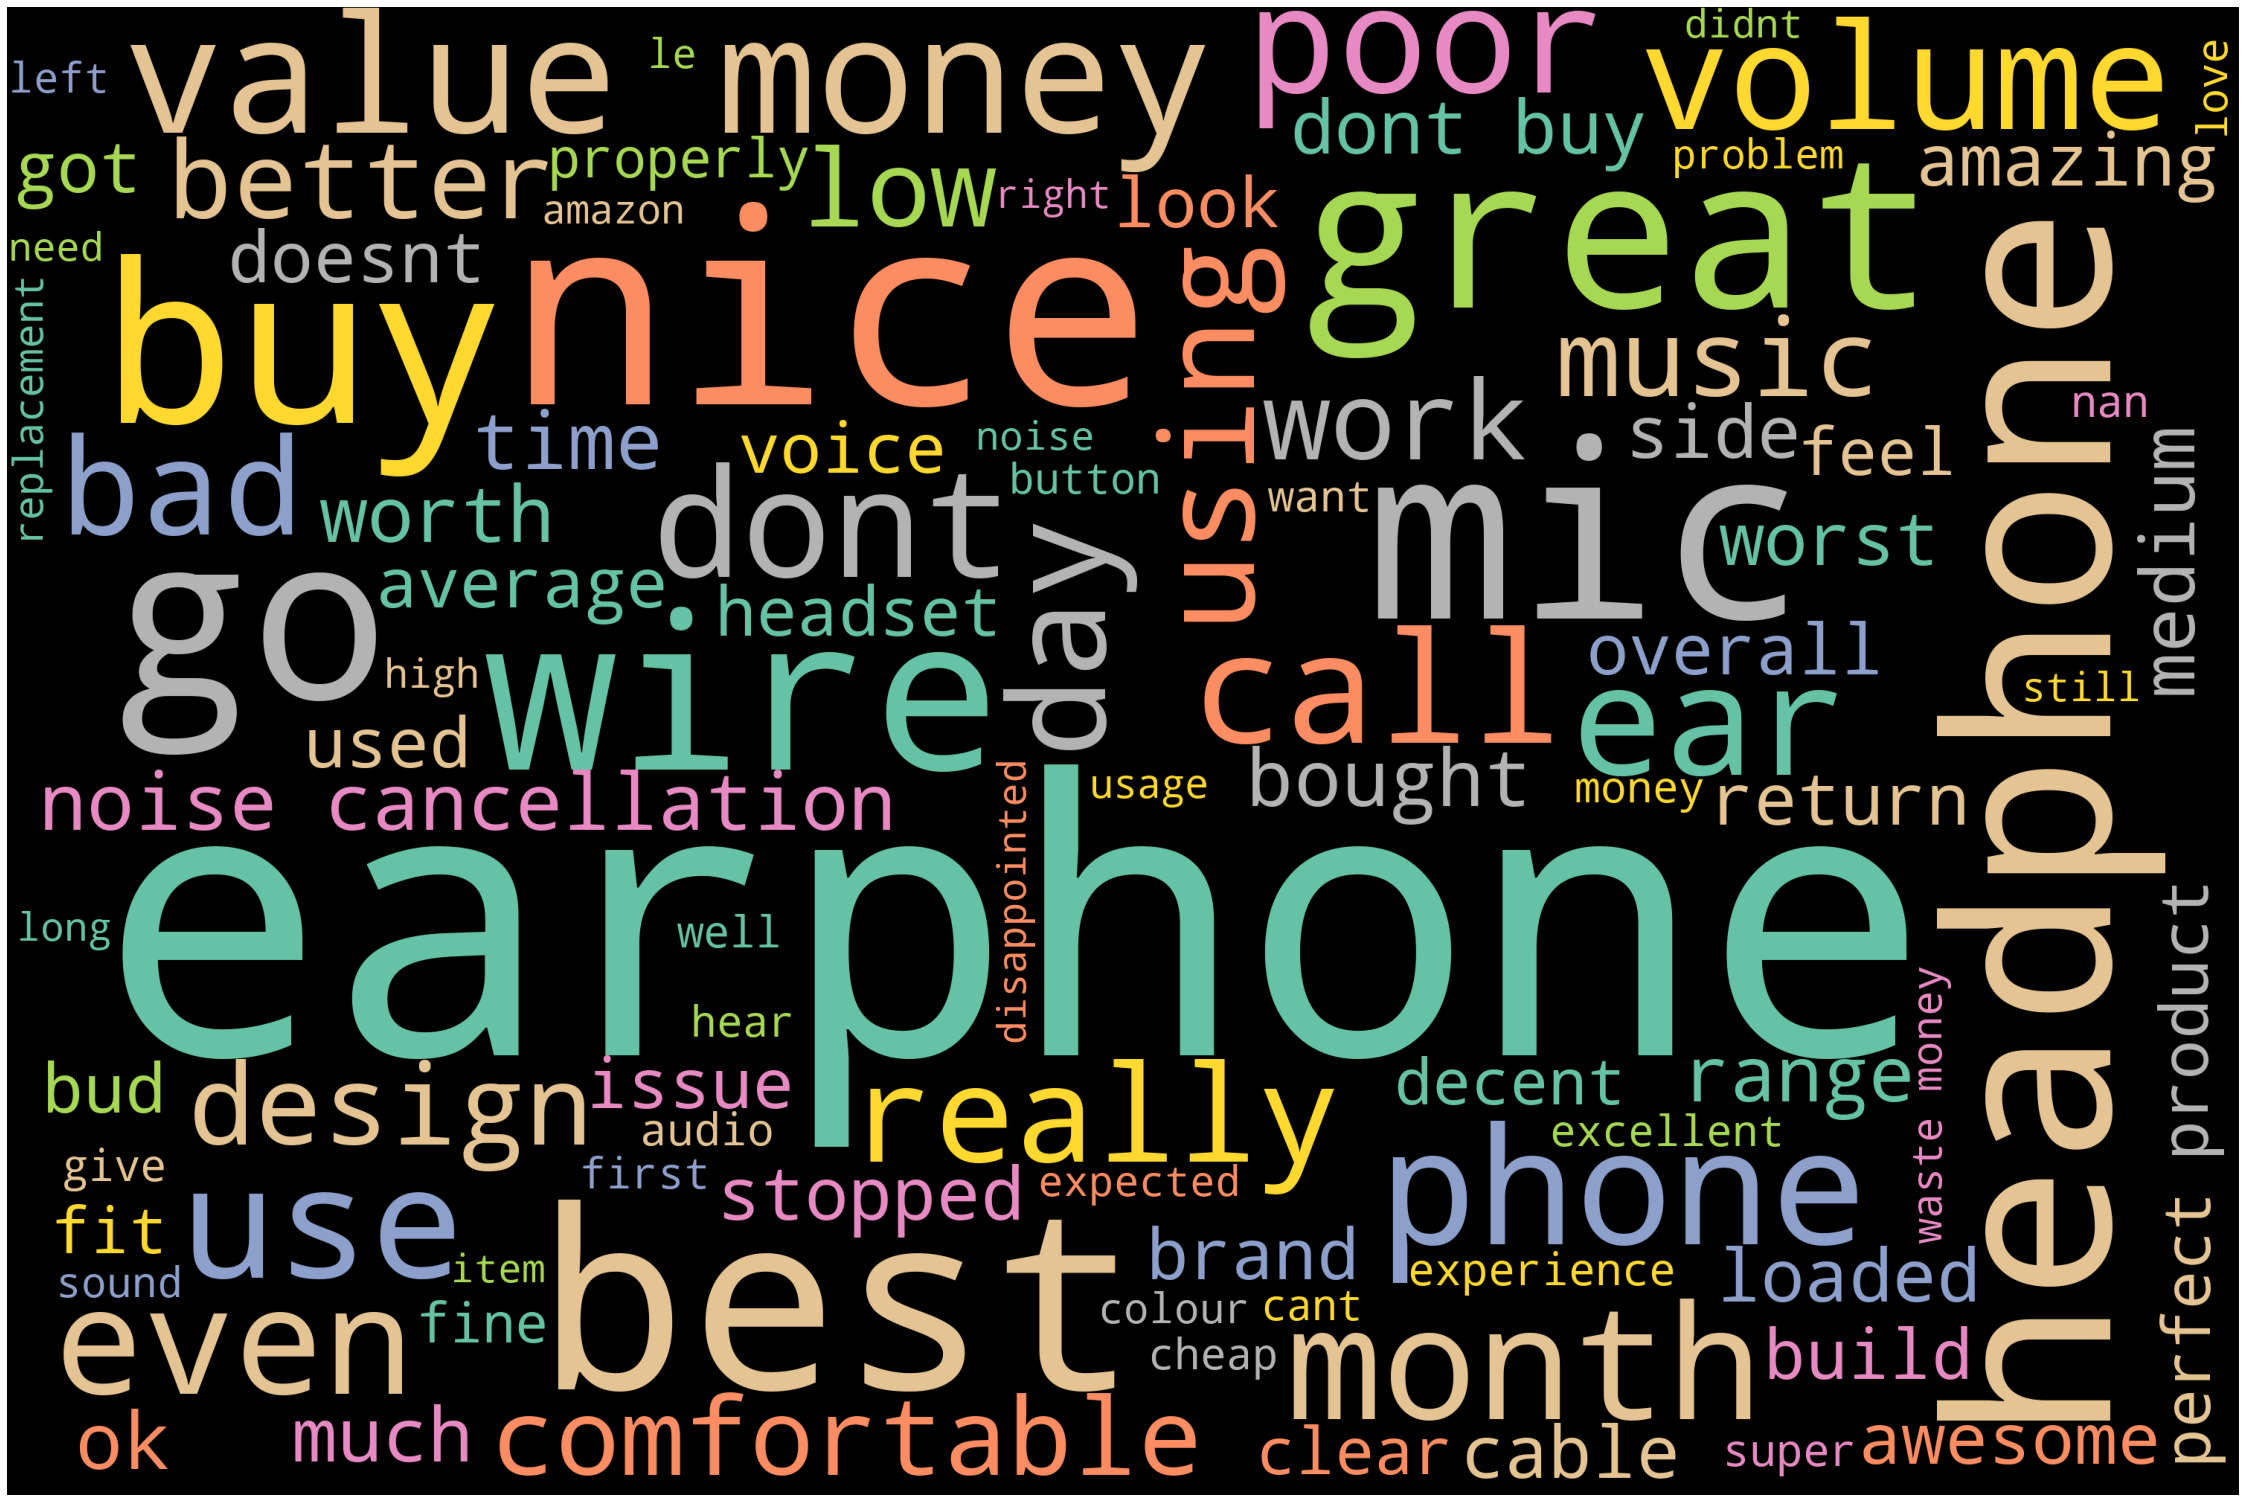

In [78]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(' '.join(review['COMMENTS']))
# Plot
plot_cloud(wordcloud)

In [79]:
#Polarity scores of Tweets
review['polarity'] = review['COMMENTS'].apply(lambda x: TextBlob(x).sentiment[0])
review[['COMMENTS','polarity']].head()

,COMMENTS,polarity
0,okay skeptical first buy tight budget honest l...,0.167262
1,earphone worth pay design earbud may cause pai...,0.330000
2,particularly people sensitive ear get pain wea...,0.416667
3,built 65 10the lower wire durable nylon know t...,0.211984
4,dont go 4 start rating brand endorse lot money...,0.338889


In [80]:
review[review.polarity>0].head()

,Customer_Name,REVIEW_TITLE,Color,REVIEW_DATE,COMMENTS,RATINGS,word_count,char_count,numerics,stopwords,upper,lower,sentiment,polarity
0,Ramdika,Really Exceed my expectation.,Black,30-May-21,okay skeptical first buy tight budget honest l...,5,65,333.0,0,27,1,65,0.167262,0.167262
1,Sachin AK,Great for a change from inear buds,Black,01-Jun-21,earphone worth pay design earbud may cause pai...,5,67,374.0,1,24,0,67,0.330000,0.330000
2,Manikandan Raj,For people with sensitive ears,Black,05-Sep-21,particularly people sensitive ear get pain wea...,4,41,211.0,0,17,0,41,0.416667,0.416667
3,Reviewguy,I tested it for a week and here's a detailed r...,Iguana,11-Sep-21,built 65 10the lower wire durable nylon know t...,4,260,1433.0,6,99,1,260,0.211984,0.211984
4,Sridhar Sarkar,Not a good headphone,Iguana,26-Jun-21,dont go 4 start rating brand endorse lot money...,2,124,655.0,2,50,0,124,0.338889,0.338889


In [81]:
review[review.polarity<0].head()

,Customer_Name,REVIEW_TITLE,Color,REVIEW_DATE,COMMENTS,RATINGS,word_count,char_count,numerics,stopwords,upper,lower,sentiment,polarity
5,gurvinder singh,Faulty earphones. Volume drop issue,Spirit Lime,05-Sep-21,please believe volume phone automatically get ...,1,100,567.0,2,28,3,100,-0.046296,-0.046296
13,Vickey,"Disappointed Looks pretty, sound's bad",Blue,15-Jun-21,audio pathetic vocal suppressed much beat high...,2,17,102.0,0,6,0,17,-0.035000,-0.035000
19,Kaiwalya Labade,It's what you pay for,White,03-Nov-21,review still keeping mind 299 earphone still c...,3,83,436.0,1,35,4,83,-0.050000,-0.050000
25,amrit raj,"It sucks, waste of money",Black,23-Oct-21,delivery fast doughts using 3 day started show...,1,71,413.0,3,27,0,71,-0.021429,-0.021429
28,Junead Q.,Good Quality and last long,White,01-Mar-22,bought total 3 earphone obviously using 1 boug...,4,74,417.0,3,25,3,74,-0.035714,-0.035714


In [83]:
review[review.polarity==0].head()

,Customer_Name,REVIEW_TITLE,Color,REVIEW_DATE,COMMENTS,RATINGS,word_count,char_count,numerics,stopwords,upper,lower,sentiment,polarity
8,Amazon Customer,"Don't buy, Not good",Iguana,27-Jul-21,side stopped within 20 day buying asking go se...,1,78,415.0,3,34,1,78,0.0,0.0
17,Subhendu Santra,Sound quality can be much better,Black,28-May-21,medium could loaded quite low,4,15,70.0,0,6,0,15,0.0,0.0
23,Amazon Customer,Worth buying,Blue,20-Jun-21,medium could loaded look clarity also could us...,4,32,187.0,0,8,0,32,0.0,0.0
57,Harshit,Best buds on budget,Iguana,15-Nov-21,see doesnt like rubber earphone want something...,5,58,287.0,1,22,1,58,0.0,0.0
62,Nikhil.S,No adequate bass and sound quality.,Black,23-Oct-21,returning upto expectation eww like 50 r marke...,3,72,333.0,2,32,1,72,0.0,0.0


In [84]:
def sent_type(Text):
 for polarity in Text:
        if polarity>0:
           print('positive')
        elif polarity==0:
           print('neutral')   
        else:
           print('negative')

In [85]:
sent_type(review['polarity'])

positive
positive
positive
positive
positive
negative
positive
positive
neutral
positive
positive
positive
positive
negative
positive
positive
positive
neutral
positive
negative
positive
positive
positive
neutral
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
neutral
positive
positive
positive
positive
neutral
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
neutral
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
neutral
positive
positive
negative
negative
positive

In [87]:
review['category']=review['polarity']

review.loc[review.category>0,'category']='Positive'
review.loc[review.category!='Positive','category']='Negative'

review['category']=review['category'].astype('category')
review.dtypes

Customer_Name      object
REVIEW_TITLE       object
Color              object
REVIEW_DATE        object
COMMENTS           object
RATINGS             int64
word_count          int64
char_count        float64
numerics            int64
stopwords           int64
upper               int64
lower               int64
sentiment         float64
polarity          float64
category         category
dtype: object

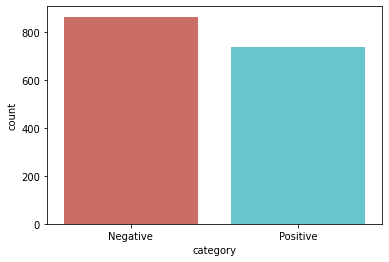

In [89]:
#visualizing +ve and -ve Tweets
sns.countplot(x='category',data=review,palette='hls')

In [90]:
review.category.value_counts(normalize=True).mul(100)

Negative    53.990025
Positive    46.009975
Name: category, dtype: float64

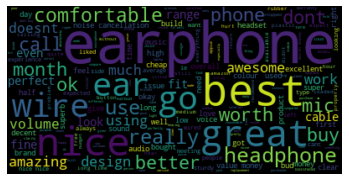

In [94]:
# +ve REVIEW
positive_reviews=review[review.category=="Positive"]
positive_reviews_comments=' '.join(positive_reviews.COMMENTS.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=500).generate(positive_reviews_comments)
plt.imshow(positive_reviews_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

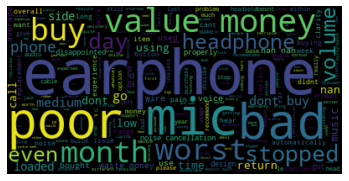

In [97]:
# -ve REVIEW
negative_reviews=review[review.category=="Negative"]
negative_reviews_comments=' '.join(negative_reviews.COMMENTS.to_numpy().tolist())
negative_reviews_cloud=WordCloud(background_color='black',max_words=500).generate(negative_reviews_comments)
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

THEREFORE,by EMOTION MINING or SENTIMENT ANALYSIS,we can conclude that most of the reviews are "NEGATIVE".As we have 53.990025 % negative reviews and 46.009975 % positive reviews.Hence we can conclude that AMAZON product(headphone) is not recommended to customers by the reviews of the buyers.